<div style="text-align:  "> Ciencias de Datos en Python </div> <div style="text-align: left"> Autor: Freddy Ruíz </div>

#### Proyecto Final


***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargamos la data del proyecto
housePricing = np.load('.\proyecto_data\proyecto_training_data.npy')


## Realizamos el slicing de la información

In [4]:
columNames = ['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
# Asignamos el 80% de la información para entrenamiento
trainingSet = housePricing[0:int(len(housePricing)*0.8)]
# Creamos el data frame para el set de entrenamiento
dfTrainingSet = pd.DataFrame(trainingSet, columns=columNames)
print("Len Training Set: " + str(len(trainingSet)))


#Asignamos el 20% para validación y pruebas
validationSet = housePricing[int(len(trainingSet)):len(housePricing)-1]

# Creamos el data frame para el set de validación
dfValidationSet = pd.DataFrame(validationSet, columns=columNames)
print("Validation Set: " +str(len(validationSet)))



Len Training Set: 1168
Validation Set: 291


## Realizamos el análisis exploratorio

In [5]:
#----------INICIALIZAMOS LAS VARIABLES A UTILIZAR------
meanVars = []
maxVars = []
minVars = []
stdVars = []
rangeVars = []
#----------CALCULAMOS LA MEDIA, MÁX,MIN, RANGO Y STD POR VARIABLE----
for name in columNames:
    meanVars.append(dfTrainingSet[name].mean())   
    maxVars.append(dfTrainingSet[name].max())  
    minVars.append(dfTrainingSet[name].min())  
    stdVars.append(dfTrainingSet[name].std())
    rangeVars.append(dfTrainingSet[name].max()-dfTrainingSet[name].min())
    
#--------------MOSTRAMOS RESULTADOS---------------------------
print("Media por variable")
print(meanVars) 
print("\n")
print("Valor máximo por variable")
print(maxVars)
print("\n")
print("Valor minimo por variable")
print(minVars) 
print("\n")
print("Rango por variable")
print(rangeVars)
print("\n")
print("Desviación estandar por variable")
print(stdVars)


Media por variable
[180590.27739726027, 6.101027397260274, 1156.3236301369864, 6.4854452054794525, 1971.451198630137, 69.94698544698545]


Valor máximo por variable
[755000.0, 10.0, 3228.0, 14.0, 2010.0, 313.0]


Valor minimo por variable
[34900.0, 1.0, 334.0, 2.0, 1875.0, 21.0]


Rango por variable
[720100.0, 9.0, 2894.0, 12.0, 135.0, 292.0]


Desviación estandar por variable
[78815.69790179149, 1.3780252276191631, 373.7803744886528, 1.6091407087243883, 29.95170660645528, 23.478160779049645]


## Generación de histogramas

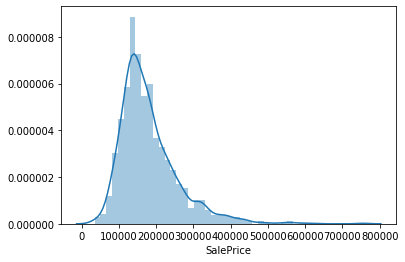

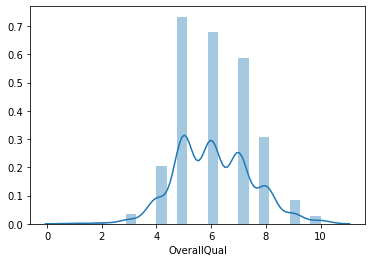

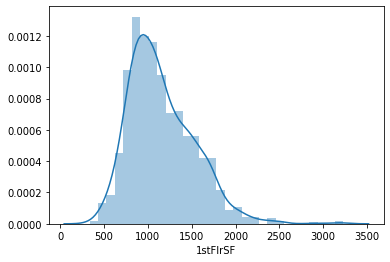

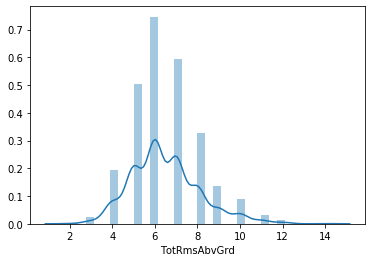

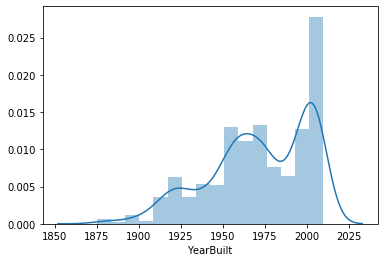

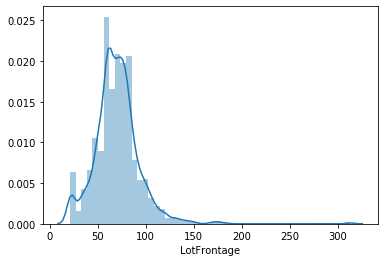

In [6]:
for name in columNames:
    sns.distplot(dfTrainingSet[name])
    plt.show()
#sns.pairplot(dfTrainingSet)

## Determinación de correlación entre variables

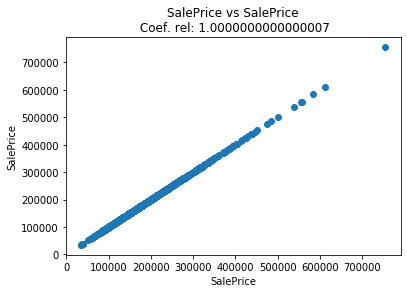

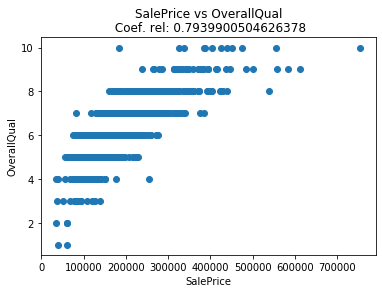

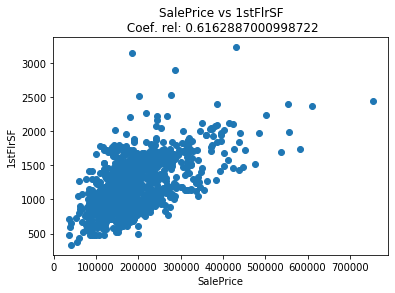

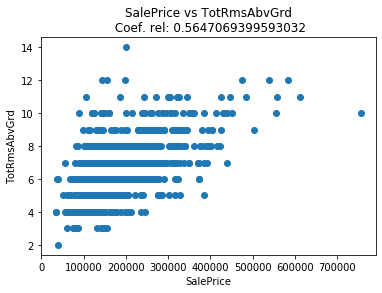

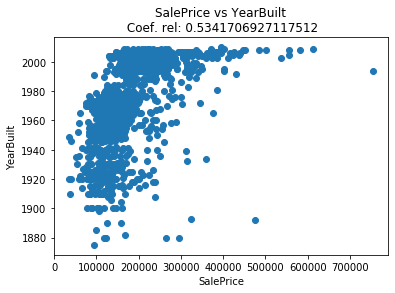

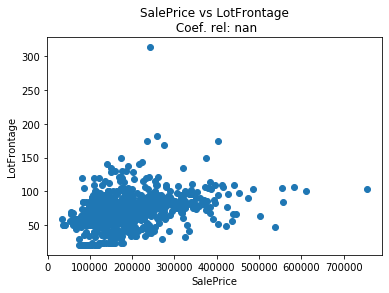

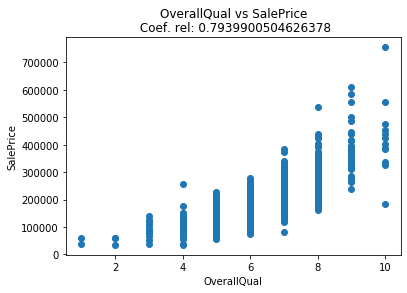

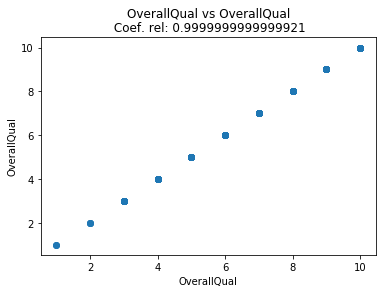

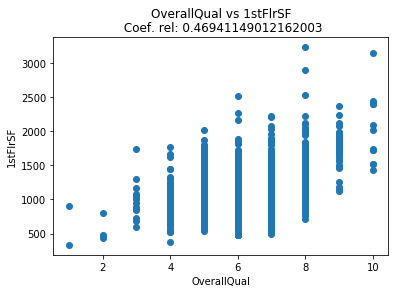

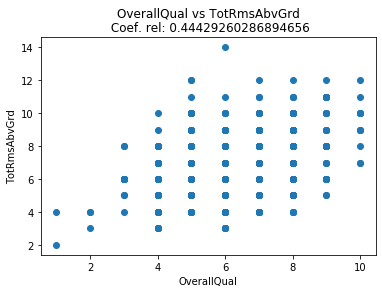

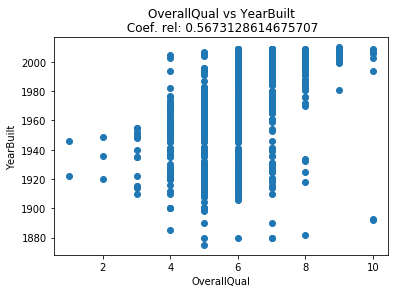

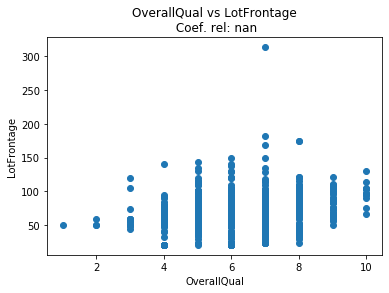

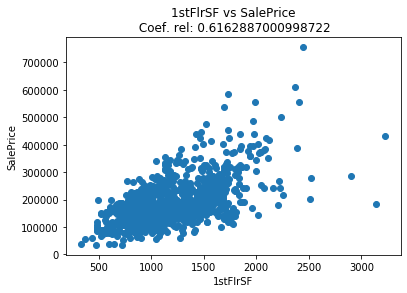

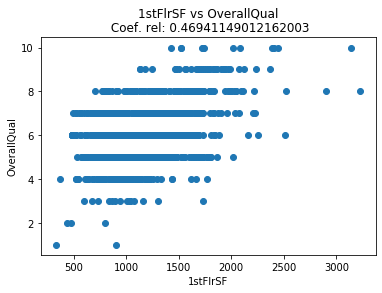

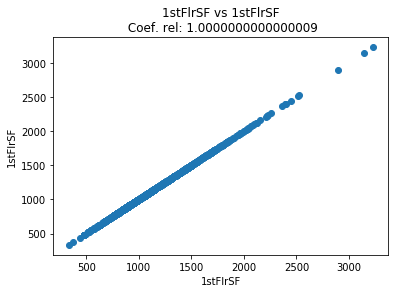

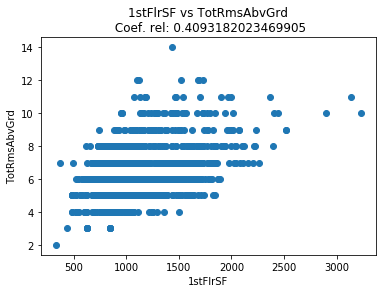

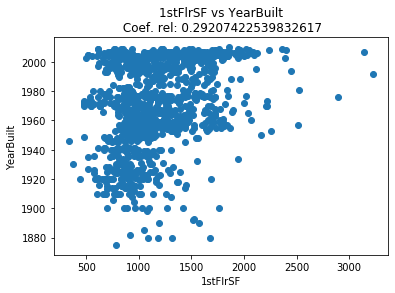

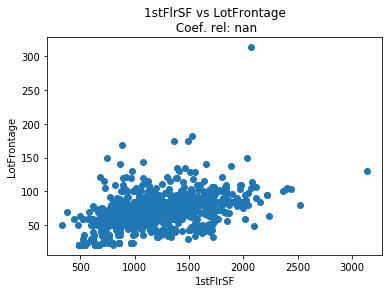

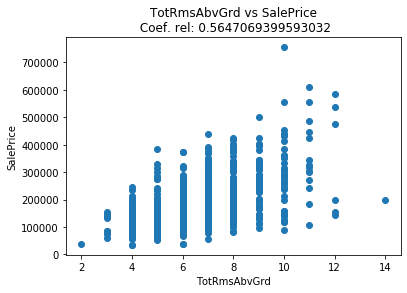

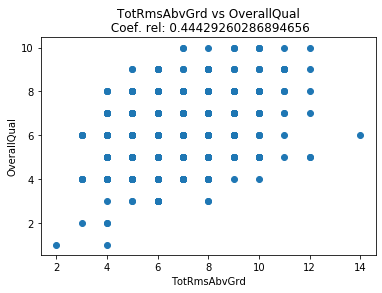

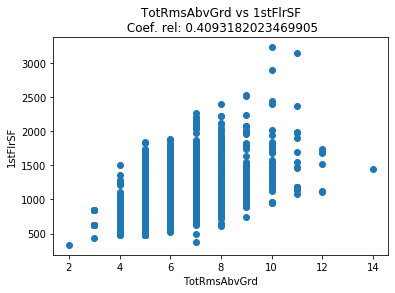

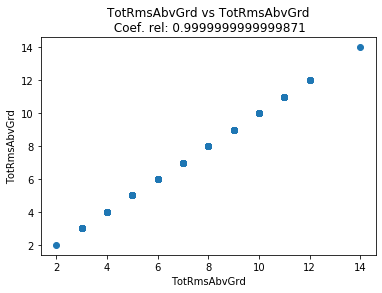

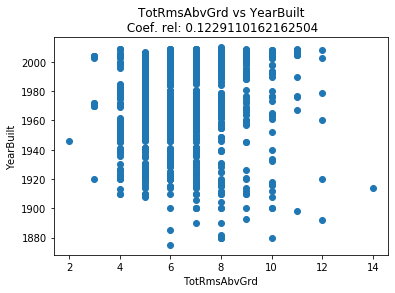

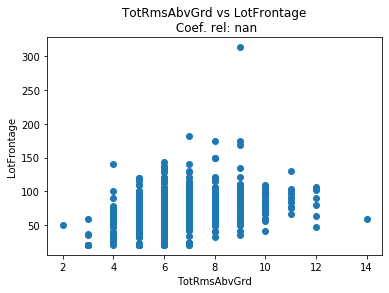

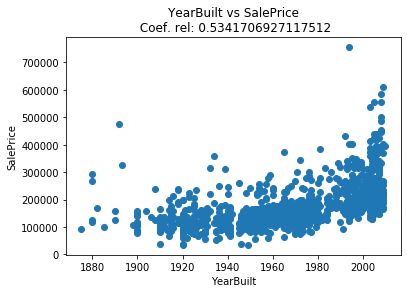

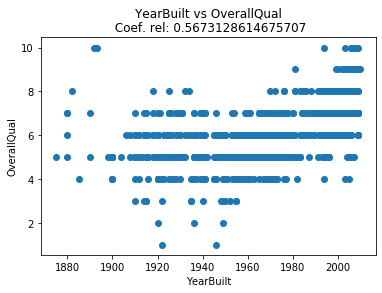

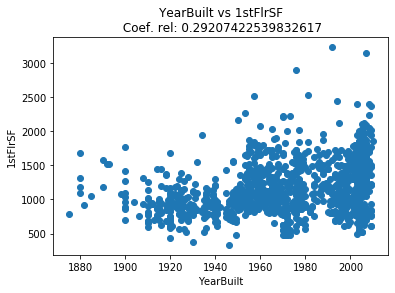

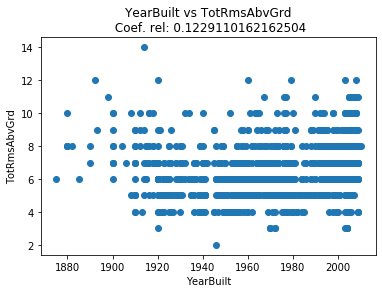

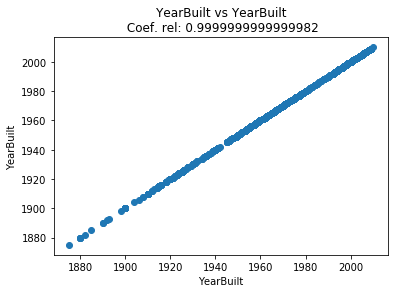

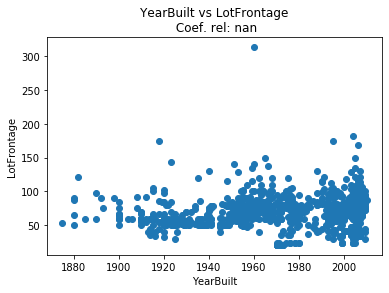

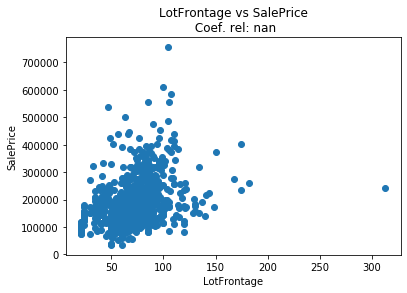

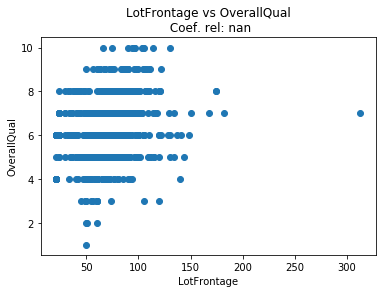

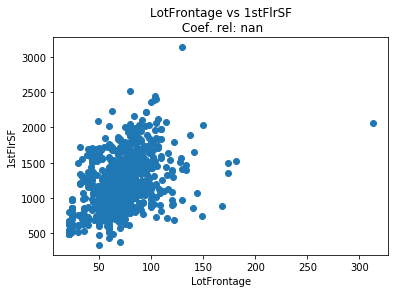

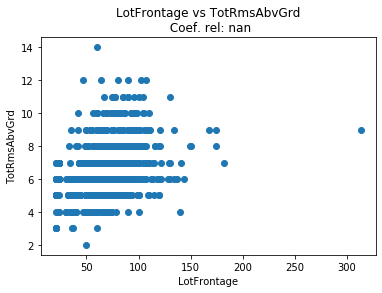

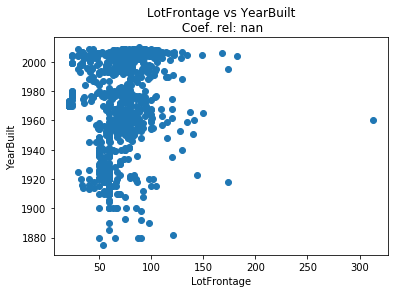

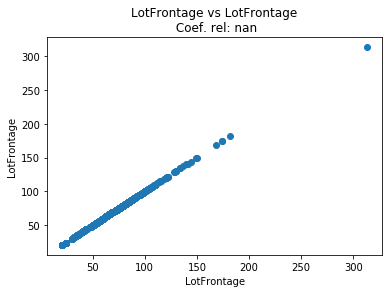

In [7]:
count_x = 0
count_y = 0
for name_x in columNames:
    for name_y in columNames:
        covariance =np.cov(dfTrainingSet[name_x],dfTrainingSet[name_y])
        plt.scatter(dfTrainingSet[name_x],dfTrainingSet[name_y])
        plt.title(name_x + " vs " + name_y + "\n Coef. rel: " + str(covariance[1,0]/(stdVars[count_x]*stdVars[count_y])))
        plt.xlabel(name_x)
        plt.ylabel(name_y)
        plt.show()
        count_y+=1
    count_y=0
    count_x+=1


#### Variables seleccionadas: x="OverallQual" y="Sale Price"

In [89]:
class my_regression():
    
    
    def __init__(self, x,y,epochs,imprimir_error_cada,learning_rate):
        self.b1 = 0.01
        self.b0 = 0.01
        self.x = x #Lista de valores x
        self.y = y #Lista de valores y
        self.epochs = epochs
        self.imprimir_error_cada = imprimir_error_cada
        self.learning_rate = learning_rate 
  
        
   
    def predict(self):
    #Inicialización de variables
        observacion = np.hstack([np.reshape(self.x.values,(-1,1)),np.reshape(np.ones_like(self.x.values),(-1,1))])
        b1=self.b1
        b0=self.b0
        epsilon = 0
        columNames = ['yp', 'x', 'b0','b1','error']
        yp = np.dot(observacion,[b1,b0])
        print(yp)
        y= self.y.values
        model_gen ={1:[]} 
        
        for i in range(1,(self.epochs)+1):
           
            #----------Cálculo del error--------------
            epsilon= (1/(2*len(y)))*np.sum((y-yp)**2)
            #--------Cálculo de gradiente de error------------
            gradientes = np.dot((yp-y),observacion)*(1/len(y))
            print(gradientes)
            if (i % self.imprimir_error_cada == 0):
                print("No. Iteracion: " + str(i) + " error: " +str(epsilon))
             #Re-Calculo de b0 y b1
            parametros=np.reshape([b1,b0],(-1,1))
            print(parametros)
            parametros = np.hstack([parametros,np.reshape([-self.learning_rate*gradientes[0],-self.learning_rate*gradientes[1]],(-1,1))])
            parametros = np.dot(parametros, np.reshape(np.ones((2,1)),(-1,1)))
            b1=parametros[0]
            b0=parametros[1]
            yp=np.reshape(np.dot(observacion,[b1,b0]),(1,-1))
            print(yp)
            model_gen[i] =[yp,observacion,parametros,epsilon]
                        
        return model_gen
    
regresion = my_regression(dfTrainingSet['OverallQual'],dfTrainingSet['SalePrice'],3,3,0.2)
regresion.predict()
            

[0.08 0.07 0.08 ... 0.08 0.09 0.07]
[-1187947.22159247  -180590.20638699]
[[0.01]
 [0.01]]
[[1699244.23150685 1461654.77718836 1699244.23150685 ... 1699244.23150685
  1936833.68582534 1461654.77718836]]
[[8326876.45301655 1305067.54397738]]
[[237589.45431849]
 [ 36118.0512774 ]]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [6]:
#Entrenador
epochs=24
imprimir_error_cada=3
for i in range(1,epochs+1):
    #print(str(i % imprimir_error_cada)+" imprimir_error: " + str(imprimir_error_cada) +"  current value: " + str(i))
    if (i % imprimir_error_cada == 0):
        print(i)

3
6
9
12
15
18
21
24


In [7]:
#Generación de matrices
x=[1,2,3,4,5,6]
#b0=np.reshape(np.ones_like(x),(-1,1))
#b1=np.reshape(np.ones_like(x),(-1,1))

observacion = np.hstack([np.reshape(x,(-1,1)),np.reshape(np.ones_like(x),(-1,1))])
print(observacion)
#print(b1)
#print(b0)



[[1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]]


[[0.2 0.2]
 [0.4 0.2]
 [0.6 0.2]
 [0.8 0.2]
 [1.  0.2]
 [1.2 0.2]]
[1.2, 1, 1.96, 0.8599999999999999, 0.020000000000000025]
['yp', 'b0', 'b1', 'x']
    yp    x    b0    b1  error
0  1.2  1.0  1.96  0.86   0.02
1  1.2  1.0  1.96  0.86   0.02
2


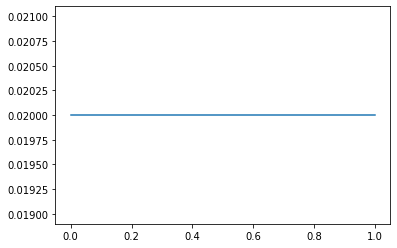

1.0


In [202]:
y=[1,2,3,4,5,6]
y=np.reshape(y,(-1,1))
yp=[1.2,2.2,3.2,4.2,5.2,6.2]
yp=np.reshape(yp,(-1,1))
learning_rate=0.2

x=[1,2,3,4,5,6]
observacion = np.hstack([np.reshape(x,(-1,1)),np.reshape(np.ones_like(x),(-1,1))])


#Cálculo del error
epsilon= (1/(2*len(y)))*np.sum((y-yp)**2)
#print(epsilon)

#Cálculo de gradiente de error
#print(yp-y)
gradientes= ((yp-y)*observacion)
print(gradientes)
gradiente_b0= (1/len(y))*np.sum(gradientes[:,0])
gradiente_b1= (1/len(y))*np.sum(gradientes[:,1])
#print(gradiente_b1*-learning_rate)
#print(gradiente_b0*-learning_rate)


#Calculo de b0 y b1
b1=2
b0=1
parametros=np.reshape([b1,b0],(-1,1))
#print(parametros)
parametros = np.hstack([parametros,np.reshape([-learning_rate*gradiente_b1,-learning_rate*gradiente_b0],(-1,1))])
#print(parametros)
parametros = np.dot(parametros, np.reshape(np.ones((2,1)),(-1,1)))
#print(parametros)
#parametros = parametros*np.reshape(np.ones(2,1))

columNames = ['yp', 'x', 'b0','b1','error']


model_gen =[yp[0,0],observacion[0,0],parametros[0,0],parametros[1,0],epsilon]
print(model_gen)
print(columnNames)
modelos_resultantes=pd.DataFrame([model_gen], columns=columNames)
modelos_resultantes.loc[1] = model_gen
print(modelos_resultantes)

print(len(modelos_resultantes['error']))

#Graficamos e
x_error = np.arange(0,len(modelos_resultantes['error']) , 1)
plt.plot(x_error, modelos_resultantes['error'])
plt.show()

print(modelos_resultantes['x'].iloc[0])

#plt.plot(modelos_resultantes['x'].iloc[0],modelos_resultantes['x'])

#print(range(0,len(modelos_resultantes['error'])-1))